In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.style.use(['science'])
plt.style.reload_library()

In [3]:
# i) previous infection by age/region
prev_df = pd.read_csv(
    '/cosma/home/dp004/dc-cues1/june_runs/configuration/run_sets/olympia/prevalence_age_region.csv'
)

In [4]:
prev_df.set_index('age',inplace=True)

In [5]:
cmap = plt.get_cmap('Set1')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


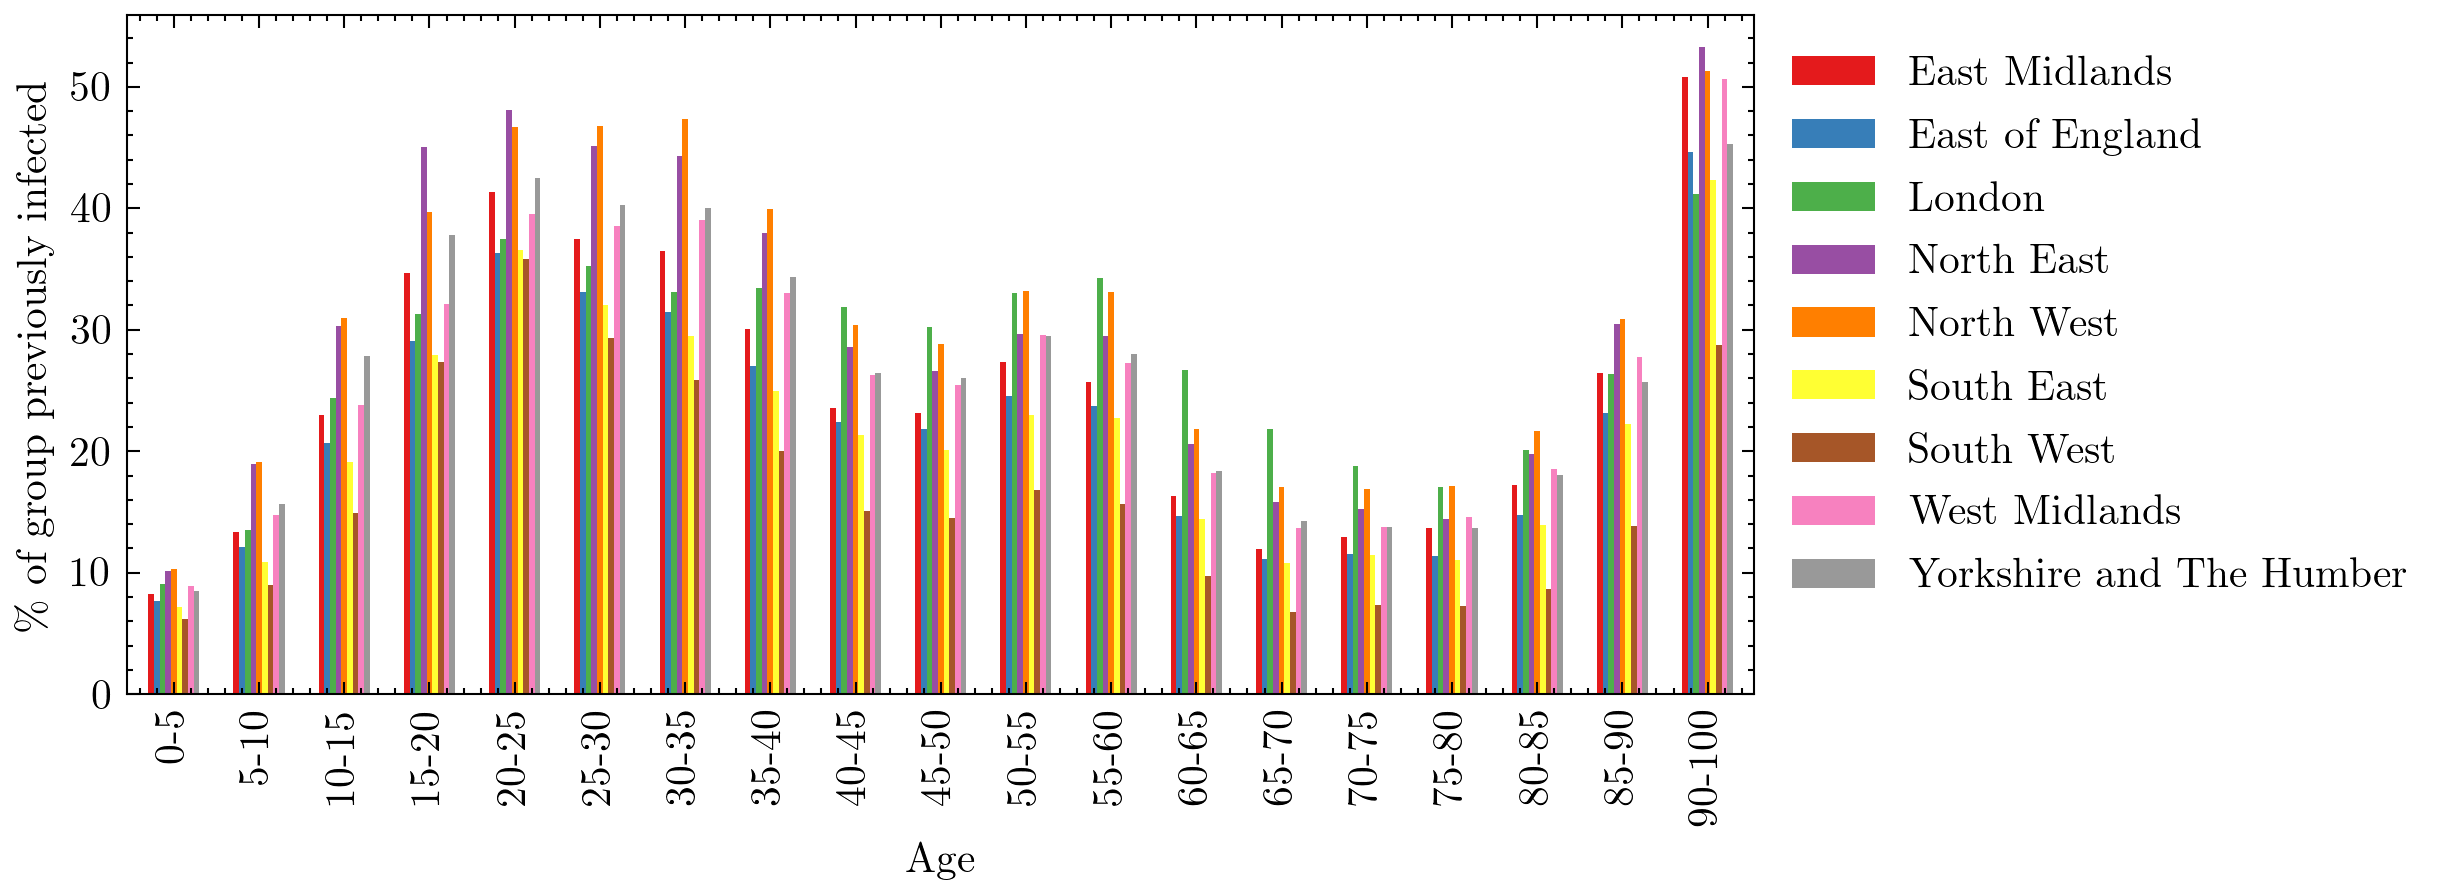

In [6]:
fig, ax = plt.subplots(figsize=(9.5,3.))

(100.*prev_df).plot.bar(figsize=(7,3),width=0.6,
                       cmap=cmap,
                       ax=ax)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel(r'\% of group previously infected')
plt.xlabel('Age')
plt.savefig('figures/previous_infection_by_age_region.pdf')

In [7]:
# ii)Vaccines


In [8]:
with open('/cosma/home/dp004/dc-cues1/june_runs/configuration/run_sets/olympia/percent_az_from_vaccintad.json') as fp:
    az_by_age = json.load(fp)
with open('/cosma/home/dp004/dc-cues1/june_runs/configuration/run_sets/olympia/percent_vaccinated_by_age.json') as fp:
    percent_vaccinated = json.load(fp)

/cosma/home/dp004/dc-cues1/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/cosma/home/dp004/dc-cues1/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


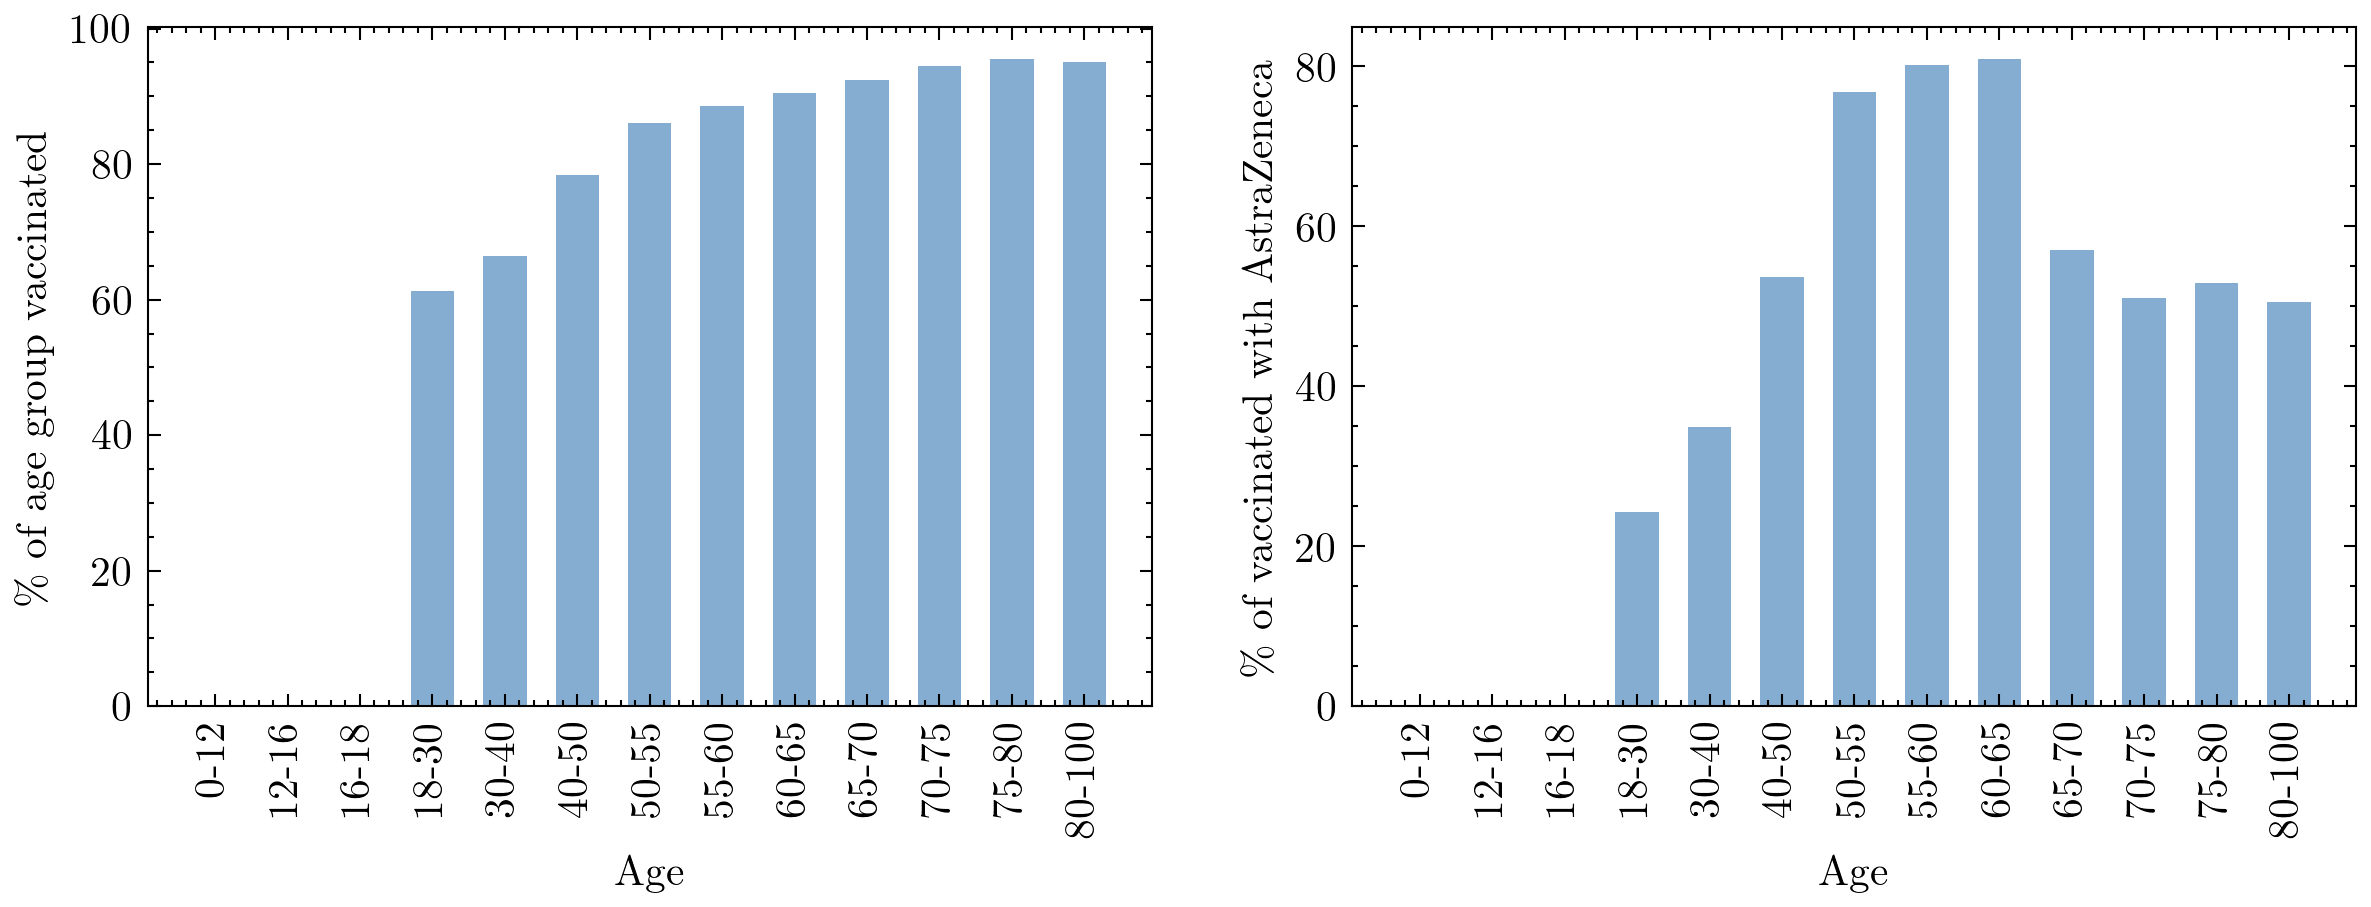

In [9]:
alpha=0.5
fig, ax = plt.subplots(ncols=2,figsize=(9.5,3.))

ax[0].bar(percent_vaccinated.keys(), np.array(list(percent_vaccinated.values())),alpha=alpha,
         width=0.6)
ax[0].set_ylabel(r'\% of age group vaccinated')
ax[0].set_xticklabels(percent_vaccinated.keys(),rotation = 90) 

ax[1].bar(az_by_age.keys(), 100.*np.array(list(az_by_age.values())),alpha=alpha, width=0.6)
ax[1].set_ylabel(r'\% of vaccinated with AstraZeneca')
ax[1].set_xticklabels(az_by_age.keys(),rotation = 90) 
ax[1].set_xlabel('Age')
ax[0].set_xlabel('Age')

plt.savefig('figures/vaccine_age_groups.pdf')